# Produção Sustentável na Agricultura

## Análise Exploratória de Dados

<center>

| Contribuidores         |
|------------------------|
| Felipe José da Cunha   |
| Hideki Nakamura        |
| Natália Françozo       |
| Nícolas Pereira Cabral |
| Vitor Baldoino         |

</center>

---

In [1]:
import importlib
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
base = pd.read_csv("dados/base-projeto-aplicado-i.csv", sep="|", decimal=",")

### Análise inicial dos dados

In [3]:
base.head()

,ano,sigla_uf,nome_uf,nome_regiao,produto,area_plantada,area_colhida,quantidade_produzida,perdas,valor_producao,...,area_cafe,producao_cafe,valor_total_producao_cafe,despesa_total_comparacao,despesa_total,despesa_defensivos,quantidade_tratores,quantidade_maquina_colheita,quantidade_maquinas_plantio,proporcao_despesa_defensivos
0,2010,AC,Acre,Norte,Café,1271.0,1003.0,1029.0,279.847,2777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,AL,Alagoas,Nordeste,Café,5.0,5.0,2.0,0.000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,AM,Amazonas,Norte,Café,2432.0,2048.0,3902.0,758.988,8804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,AP,Amapá,Norte,Café,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,BA,Bahia,Nordeste,Café,152056.0,152056.0,153262.0,0.000,560050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ano                               216 non-null    int64  
 1   sigla_uf                          216 non-null    object 
 2   nome_uf                           216 non-null    object 
 3   nome_regiao                       216 non-null    object 
 4   produto                           216 non-null    object 
 5   area_plantada                     129 non-null    float64
 6   area_colhida                      129 non-null    float64
 7   quantidade_produzida              129 non-null    float64
 8   perdas                            129 non-null    float64
 9   valor_producao                    129 non-null    float64
 10  emissao                           216 non-null    float64
 11  area_nao_utilizada                27 non-null     float64
 12  quantida

In [5]:
base.describe(include='all')

,ano,sigla_uf,nome_uf,nome_regiao,produto,area_plantada,area_colhida,quantidade_produzida,perdas,valor_producao,...,area_cafe,producao_cafe,valor_total_producao_cafe,despesa_total_comparacao,despesa_total,despesa_defensivos,quantidade_tratores,quantidade_maquina_colheita,quantidade_maquinas_plantio,proporcao_despesa_defensivos
count,216.00000,216,216,216,216,1.290000e+02,1.290000e+02,1.290000e+02,129.000000,1.290000e+02,...,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,27.000000
unique,NaN,27,27,5,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AC,Acre,Nordeste,Café,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8,8,72,216,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.50000,NaN,NaN,NaN,NaN,1.265915e+05,1.262692e+05,1.765149e+05,328.541264,9.987940e+05,...,46251.148148,6.761174e+04,5.320704e+05,1.190120e+06,1.701248e+06,151573.481481,1.702416e+07,5.828436e+06,4.075691e+06,0.136222
std,2.29661,NaN,NaN,NaN,NaN,2.563047e+05,2.561992e+05,3.834141e+05,1159.013713,2.433704e+06,...,174508.631602,2.661681e+05,1.968547e+06,1.750389e+06,2.354958e+06,155577.287171,2.089218e+07,6.276819e+06,4.672099e+06,0.084676
min,2010.00000,NaN,NaN,NaN,NaN,5.000000e+00,5.000000e+00,2.000000e+00,0.000000,1.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,4.971000e+03,5.438300e+04,3206.000000,3.527460e+05,9.003300e+04,6.421900e+04,0.036000
25%,2011.75000,NaN,NaN,NaN,NaN,1.648000e+03,1.538000e+03,1.534000e+03,0.000000,6.687000e+03,...,0.000000,0.000000e+00,2.835000e+03,4.696500e+04,4.743115e+05,50729.500000,2.371060e+06,1.164270e+06,6.891330e+05,0.065000
50%,2013.50000,NaN,NaN,NaN,NaN,1.120100e+04,1.120100e+04,1.218200e+04,0.399000,4.017100e+04,...,144.000000,6.500000e+01,1.702600e+04,2.878030e+05,6.798150e+05,100601.000000,6.544964e+06,2.830683e+06,1.296181e+06,0.109000
75%,2015.25000,NaN,NaN,NaN,NaN,1.520560e+05,1.520560e+05,1.408360e+05,81.667000,6.946090e+05,...,2758.500000,3.766000e+03,1.520090e+05,1.990214e+06,2.140766e+06,200419.000000,2.395181e+07,9.269072e+06,6.730812e+06,0.191500


<Axes: ylabel='Count'>

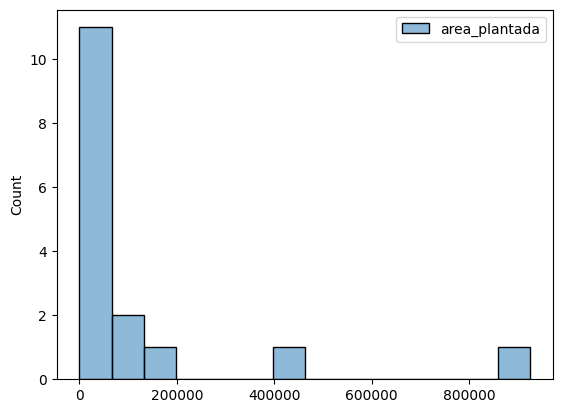

In [6]:
base = base.dropna()
sns.histplot(data = base[['area_plantada']])

<Axes: ylabel='Count'>

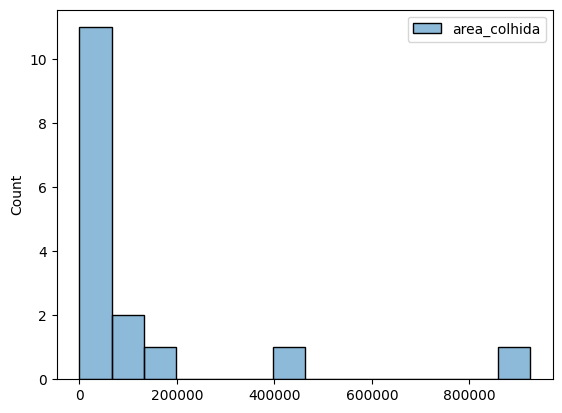

In [7]:
sns.histplot(data = base[['area_colhida']])

<Axes: ylabel='Count'>

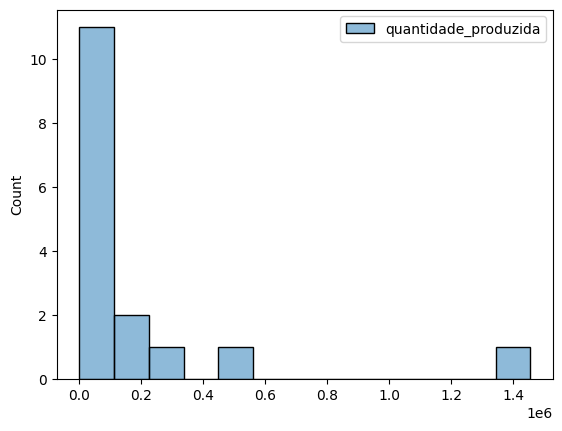

In [8]:
sns.histplot(data = base[['quantidade_produzida']])

<Axes: ylabel='Count'>

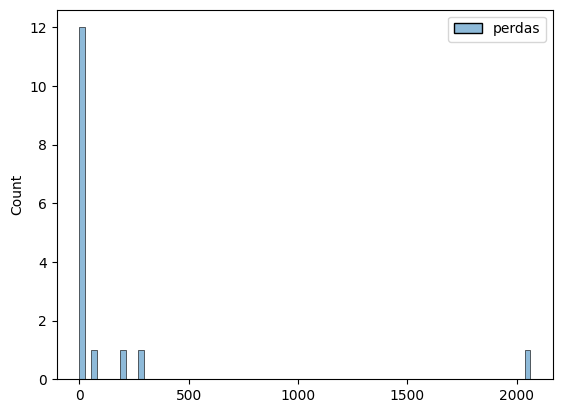

In [9]:
sns.histplot(data = base[['perdas']])

<Axes: ylabel='Count'>

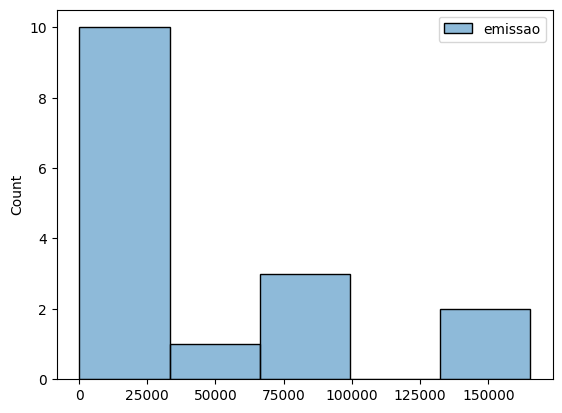

In [15]:
sns.histplot(data = base[['emissao']])

<Axes: >

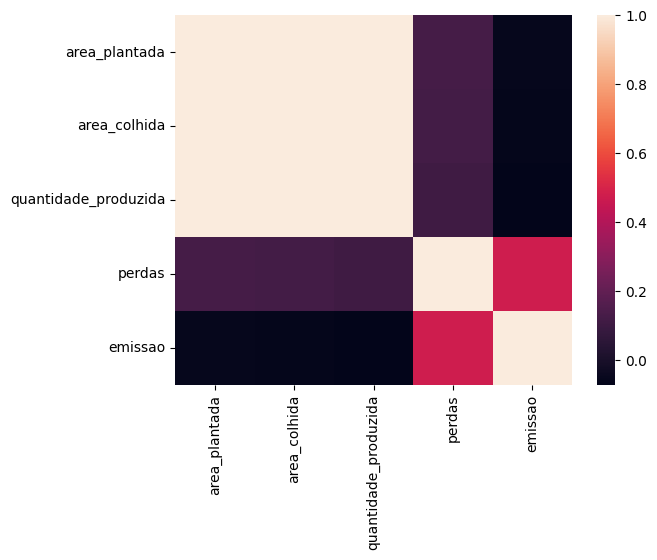

In [18]:
c = base[['area_plantada', 'area_colhida', 'quantidade_produzida', 'perdas', 'emissao']].corr()
sns.heatmap(c)

### Qual a relação entre área plantada, emissão de gases de efeito estufa, quantidade produzida e produtividade (``quantidade_produzida / area_plantada``)?

In [16]:
# Cria o dataframe e retira todo e qualquer registro com NaN, seja da area plantada, da quantidade produzida ou na emissao"
base_emissao_por_area_ou_qtd = base[["nome_regiao","area_plantada","quantidade_produzida","emissao"]]
base_emissao_por_area_ou_qtd = base_emissao_por_area_ou_qtd.dropna()

# Agrupa os dados por região e soma as áreas plantadas, quantidades produzidas e as emissões
base_emissao_por_area_ou_qtd = base_emissao_por_area_ou_qtd.groupby(["nome_regiao"])
base_emissao_por_area_ou_qtd = base_emissao_por_area_ou_qtd.sum()

# adiciona uma coluna da produtividade (quantidade_produzida / area_plantada)
base_emissao_por_area_ou_qtd["produtividade"] = base_emissao_por_area_ou_qtd["quantidade_produzida"] / base_emissao_por_area_ou_qtd["area_plantada"]

# adiciona uma coluna com a relação entre as emissões e a área plantada.
base_emissao_por_area_ou_qtd["emissao_por_area_plantada"] = base_emissao_por_area_ou_qtd["emissao"] / base_emissao_por_area_ou_qtd["area_plantada"]
# adiciona uma coluna com a relação entre as emissões e a quantidade produzida
base_emissao_por_area_ou_qtd["emissao_por_qtd_produzida"] = base_emissao_por_area_ou_qtd["emissao"] / base_emissao_por_area_ou_qtd["quantidade_produzida"]

# adiciona uma coluna com a relação entre as emissões e a produtividade
base_emissao_por_area_ou_qtd["emissao_por_produtividade"] = base_emissao_por_area_ou_qtd["emissao"] / base_emissao_por_area_ou_qtd["produtividade"]

base_emissao_por_area_ou_qtd.describe(include='all')
display(base_emissao_por_area_ou_qtd)


,area_plantada,quantidade_produzida,emissao,produtividade,emissao_por_area_plantada,emissao_por_qtd_produzida,emissao_por_produtividade
nome_regiao,,,,,,,
Centro-oeste,22404.0,22830.0,227224.503,1.019014,10.142140,9.952891,222984.571407
Nordeste,131834.0,161993.0,147652.263,1.228765,1.119986,0.911473,120163.145570
Norte,74130.0,144356.0,1718.519,1.947336,0.023183,0.011905,882.497530
Sudeste,1537131.0,2288113.0,123961.384,1.488561,0.080645,0.054176,83275.994739
Sul,40168.0,67216.0,165435.173,1.673372,4.118581,2.461247,98863.366298


### Quais sãs as perdas por área plantada de cada região?

In [7]:
# TO DO: procurar ouliers e remover da análise

# Cria um dataframe, eliminando registro que contenha NaN em perdas ou area plantada
base_perda_por_regiao = base[["nome_regiao","perdas","area_plantada"]]
base_perda_por_regiao.dropna()

# Agrupa os dados por ano e região e soma as perdas e areas plantadas
base_perda_por_regiao = base_perda_por_regiao.groupby(['nome_regiao'])
base_perda_por_regiao = base_perda_por_regiao.sum()

# Calculas as perdar por cada região divindo as perdas pela área plantada
base_perda_por_regiao["perda_por_area_plantada"] = base_perda_por_regiao["perdas"] / base_perda_por_regiao["area_plantada"]

# Exibe o dataframe como uma tabela
display(base_perda_por_regiao)


,perdas,area_plantada,perda_por_area_plantada
nome_regiao,,,
Centro-oeste,582.188,221474.0,0.002629
Nordeste,11285.072,1318472.0,0.008559
Norte,14665.339,924910.0,0.015856
Sudeste,12620.574,13403920.0,0.000942
Sul,3228.650,461527.0,0.006996


### Qual é a correlação entre as perdas totais e a emissões de gases de efeito estufa totais?

In [8]:
# Cria dataframe, elimina NAs
base_perda_emissao = base[["ano", "nome_regiao", "area_plantada", "area_colhida", "perdas", "emissao"]]
base_perda_emissao = base_perda_emissao.dropna()

# Agrupa e soma
base_perda_emissao = base_perda_emissao.groupby(['ano', 'nome_regiao']).sum()

# Cálculo da correção
correlacao = base_perda_emissao['perdas'].corr(base_perda_emissao['emissao'])

# Correlação negativa: significa que há uma relação inversa entre perda e emissão.
# Correlação positiva: significa que há uma relação direta entre perda e emissão.

print(f"A correlação entre a perda e emissão de gases de efeito estufa é: {correlacao}")

A correlação entre a perda e emissão de gases de efeito estufa é: -0.28422718921771595


### Qual a relação entre a produtividade e a perda considerando os 5 estados com maior produtividade?

In [9]:
# Cria o dataframe e retira todo e qualquer registro com NaN, seja da area plantada, da quantidade produzida ou na emissao"
base_produtividade_perda_top5 = base[["nome_uf","area_plantada","quantidade_produzida","perdas"]]
base_produtividade_perda_top5 = base_produtividade_perda_top5.dropna()

# adiciona uma coluna da produtividade (quantidade_produzida / area_plantada)
base_produtividade_perda_top5["produtividade"] = base_produtividade_perda_top5["quantidade_produzida"] / base_produtividade_perda_top5["area_plantada"]

# adiciona uma coluna de perdas por produtividade (perdas / produtividade)
base_produtividade_perda_top5["perda_por_produtividade"] = base_produtividade_perda_top5["perdas"] / base_produtividade_perda_top5["produtividade"]
# Agrupa os dados por estado e soma os valores area_plantada,quantidade_produziada e perdas
base_produtividade_perda_top5 = base_produtividade_perda_top5.groupby(['nome_uf'])
base_produtividade_perda_top5 = base_produtividade_perda_top5.sum()

# Lista os 5 maiores estados por produtividade
base_produtividade_perda_top5 = base_produtividade_perda_top5.nlargest(5,'produtividade')

#exibe os dados
display(base_produtividade_perda_top5)

,area_plantada,quantidade_produzida,perdas,produtividade,perda_por_produtividade
nome_uf,,,,,
Goiás,58373.0,142744.0,171.693,19.821239,68.777180
Distrito Federal,5297.0,9668.0,382.617,15.348673,235.613200
Paraná,461527.0,701108.0,3228.650,12.005568,2696.165471
Minas Gerais,8096613.0,12037324.0,7608.475,11.890786,5594.545188
Espírito Santo,3591361.0,5261355.0,2096.975,11.694608,1666.011060


---

### Perdas por região, do maior para o menor

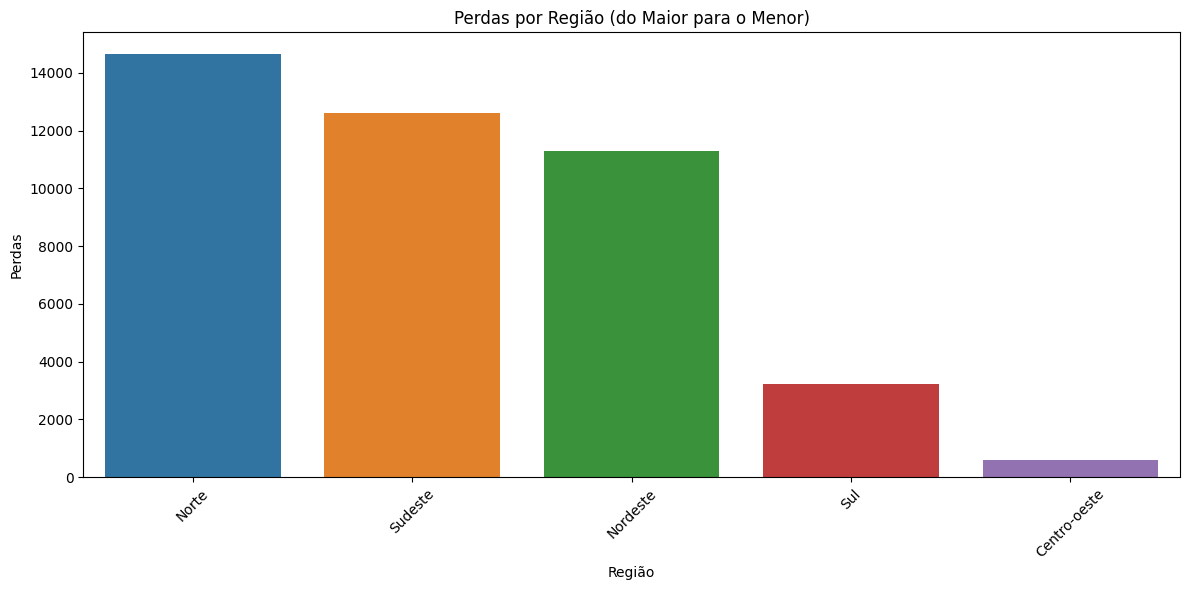

In [10]:
base_perda_por_regiao_sorted = base_perda_por_regiao.sort_values(by="perdas", ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=base_perda_por_regiao_sorted,
    x=base_perda_por_regiao_sorted.index,
    y=base_perda_por_regiao_sorted["perdas"],
)

ax.set(
    title="Perdas por Região (do Maior para o Menor)",
    xlabel="Região",
    ylabel="Perdas",
)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Perdas por área plantada

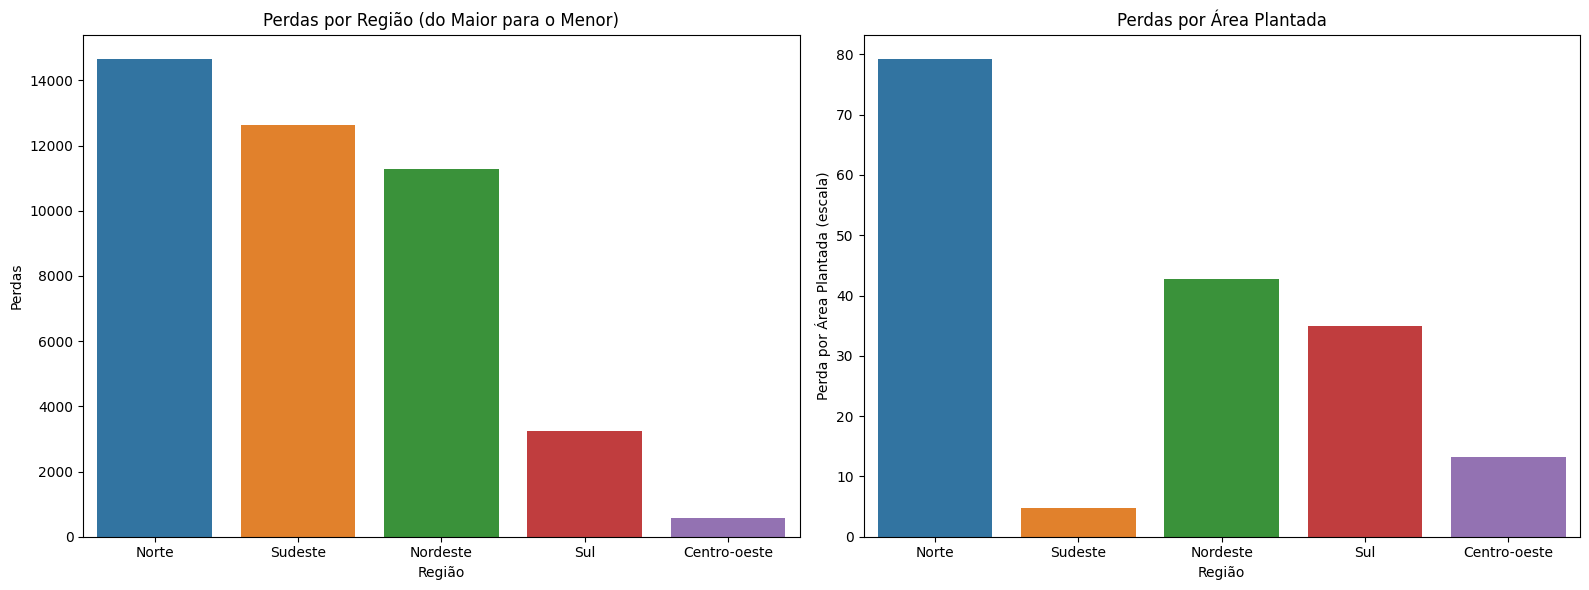

In [11]:
base_perda_por_regiao_sorted = base_perda_por_regiao.sort_values(by='perdas', ascending=False)

# Crie uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Perdas
sns.barplot(data=base_perda_por_regiao_sorted,
            x=base_perda_por_regiao_sorted.index,
            y=base_perda_por_regiao_sorted["perdas"],
            ax=ax1)

ax1.set(
    title="Perdas por Região (do Maior para o Menor)",
    xlabel="Região",
    ylabel="Perdas",
)

# Gráfico 2: Perda por Área Plantada

factor = 5000 # Fator de escala para perda por área plantada

sns.barplot(data=base_perda_por_regiao_sorted,
            x=base_perda_por_regiao_sorted.index,
            y= base_perda_por_regiao_sorted["perda_por_area_plantada"] * factor,
            ax=ax2)

ax2.set(
    title="Perdas por Área Plantada",
    xlabel="Região",
    ylabel="Perda por Área Plantada (escala)",
)


plt.tight_layout()
plt.show()